# Smart City Energy Consumption Analysis

**Author**: Sekar Kumaran M  
**Date**: September 2025  
**Objective**: Complete data science pipeline for energy consumption prediction

---

##  Project Goals
- Analyze smart city energy consumption patterns
- Build predictive models for energy demand
- Provide actionable insights for energy optimization

**Dataset**: Smart City Energy Dataset (72,960 records)  
**Target**: Energy consumption prediction for smart city optimization

##  Analysis Workflow

This notebook follows a streamlined data science workflow:

```
1. Setup & Data Loading     → Import libraries and load data
2. Data Quality Check       → Assess data completeness and quality
3. Data Cleaning            → Remove irrelevant features
4. Exploratory Analysis     → Understand data patterns
5. Feature Preparation      → Prepare features for modeling
6. Model Development        → Train and compare models
7. Results & Deployment     → Evaluate and save best model
```

**Key Principles:**
-  Clean and focused code
-  Clear visualizations
-  Efficient processing
-  Comprehensive evaluation

## 1. Setup & Libraries

In [19]:
# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Model saving
import joblib

# Configuration
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print(" All libraries imported successfully!")
print(" Environment ready for analysis")

 All libraries imported successfully!
 Environment ready for analysis


## 2. Data Loading & Initial Exploration

In [20]:
# Load dataset
df = pd.read_csv('data/smart_city_energy_dataset.csv')

# Basic information
print(f" Dataset Shape: {df.shape}")
print(f" Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f" Columns: {df.shape[1]}")
print(f" Rows: {df.shape[0]:,}")

print("\n" + "="*50)
print("FIRST 5 ROWS:")
display(df.head())

 Dataset Shape: (72960, 60)
 Memory Usage: 57.2 MB
 Columns: 60
 Rows: 72,960

FIRST 5 ROWS:


,Timestamp,Hour of Day,Day of Week,Is Weekend,Is Holiday,Season,Week of Year,Month,Historical Electricity Load (kW),Peak Load Indicator,...,Region/Zone ID,Latitude,Longitude,Altitude (m),Distance to Nearest Substation (km),Area Type,Electricity Load,Renewable Energy Load,Net Load,Curtailment Risk / Surplus Flag
0,2021-01-01 00:00:00,0,4,0,0,1,53,1,192.976646,0,...,ZoneA,35.009842,-105.518617,225.154387,0.599292,Suburban,209.578166,116.667293,92.910873,0
1,2021-01-01 00:30:00,0,4,0,0,2,53,1,709.417292,0,...,ZoneB,37.067136,-120.634755,556.305113,6.022215,Urban,711.329436,40.603240,670.726196,0
2,2021-01-01 01:00:00,1,4,0,0,2,53,1,441.323762,0,...,ZoneB,39.952764,-114.198386,432.500561,0.311498,Suburban,434.571941,45.235566,389.336376,0
3,2021-01-01 01:30:00,1,4,0,0,1,53,1,110.061053,0,...,ZoneA,44.179765,-78.504895,12.658897,2.689435,Urban,119.913430,216.133025,-96.219595,1
4,2021-01-01 02:00:00,2,4,0,0,2,53,1,741.130717,0,...,ZoneA,29.232799,-74.472891,477.191782,6.382530,Rural,747.746618,320.609219,427.137399,0


In [21]:
# Data types and info
print(" DATASET INFO:")
print("="*40)
df.info()

print("\n BASIC STATISTICS:")
print("="*40)
display(df.describe())

 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72960 entries, 0 to 72959
Data columns (total 60 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Timestamp                                  72960 non-null  object 
 1   Hour of Day                                72960 non-null  int64  
 2   Day of Week                                72960 non-null  int64  
 3   Is Weekend                                 72960 non-null  int64  
 4   Is Holiday                                 72960 non-null  int64  
 5   Season                                     72960 non-null  int64  
 6   Week of Year                               72960 non-null  int64  
 7   Month                                      72960 non-null  int64  
 8   Historical Electricity Load (kW)           72960 non-null  float64
 9   Peak Load Indicator                        72960 non-null  int64  
 10  Load Se

,Hour of Day,Day of Week,Is Weekend,Is Holiday,Season,Week of Year,Month,Historical Electricity Load (kW),Peak Load Indicator,Transformer Load Level,...,Time Since Last Peak (hours),Time Until Next Predicted Peak (hours),Latitude,Longitude,Altitude (m),Distance to Nearest Substation (km),Electricity Load,Renewable Energy Load,Net Load,Curtailment Risk / Surplus Flag
count,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,...,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000,72960.000000
mean,11.500000,3.000658,0.285526,0.029742,1.345587,25.684211,6.326974,451.082034,0.050000,64.569814,...,4.981774,4.996919,35.020602,-94.967888,198.808387,3.012531,451.125946,130.095986,321.029960,0.088501
std,6.922234,1.999520,0.451668,0.169877,0.962633,15.346724,3.520313,261.097458,0.217946,19.370701,...,4.959323,4.995975,5.789158,17.321252,199.043483,3.007505,261.919067,94.630086,278.760755,0.284023
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.017395,0.000000,10.000000,...,0.000014,0.000168,25.000404,-124.999946,0.000213,0.000024,-36.072597,0.095168,-808.969508,0.000000
25%,5.750000,1.000000,0.000000,0.000000,0.000000,12.000000,3.000000,259.303275,0.000000,51.249926,...,1.436146,1.444629,29.988326,-109.948321,57.136083,0.877959,258.849618,61.306813,127.240556,0.000000
50%,11.500000,3.000000,0.000000,0.000000,1.000000,25.000000,6.000000,401.365136,0.000000,64.884472,...,3.451137,3.477480,35.056486,-94.917402,138.185597,2.099055,401.776552,107.599088,280.214561,0.000000
75%,17.250000,5.000000,1.000000,0.000000,2.000000,39.000000,9.000000,590.307880,0.000000,78.494463,...,6.943910,6.909410,40.042462,-79.991197,275.122943,4.169201,591.184038,175.106845,474.376024,0.000000
max,23.000000,6.000000,1.000000,1.000000,3.000000,53.000000,12.000000,2583.376878,1.000000,100.000000,...,58.284708,54.303082,44.999614,-65.000087,2693.307026,36.118631,2626.808971,990.816965,2513.771211,1.000000


## 3. Data Quality Assessment

In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print(" MISSING VALUES ANALYSIS:")
print("="*50)

if missing_data.sum() == 0:
    print(" No missing values found - excellent data quality!")
else:
    print(f" Found missing values in {(missing_data > 0).sum()} columns")
    display(missing_summary[missing_summary['Missing_Count'] > 0])

# Duplicates check
duplicates = df.duplicated().sum()
print(f"\n Duplicate rows: {duplicates}")



 MISSING VALUES ANALYSIS:
 No missing values found - excellent data quality!

 Duplicate rows: 0


## 4. Data Cleaning

In [23]:
# Remove identifier and metadata columns
identifier_cols = [
    "Timestamp", "Substation ID / Region ID", "Region/Zone ID", 
    "Latitude", "Longitude", "Altitude (m)", 
    "Distance to Nearest Substation (km)"
]

# Remove derived/calculated columns
derived_cols = [
    "Peak Load Indicator", "Net Load", "Renewable Energy Load", 
    "Curtailment Risk / Surplus Flag", "Time Since Last Peak", 
    "Time Until Next Predicted Peak", "Inverter Efficiency (%)"
]

# Combine removal lists
cols_to_remove = identifier_cols + derived_cols
existing_cols_to_remove = [col for col in cols_to_remove if col in df.columns]

print(" REMOVING UNNECESSARY COLUMNS:")
print("="*50)
print(f"Identifier columns: {len([c for c in identifier_cols if c in df.columns])}")
print(f"Derived columns: {len([c for c in derived_cols if c in df.columns])}")
print(f"Total to remove: {len(existing_cols_to_remove)}")

# Clean dataset
df_clean = df.drop(columns=existing_cols_to_remove)

print(f"\n CLEANING RESULTS:")
print(f"Original: {df.shape[1]} columns → Clean: {df_clean.shape[1]} columns")
print(f"Removed: {len(existing_cols_to_remove)} columns")
print(f" Data cleaning completed!")

 REMOVING UNNECESSARY COLUMNS:
Identifier columns: 7
Derived columns: 5
Total to remove: 12

 CLEANING RESULTS:
Original: 60 columns → Clean: 48 columns
Removed: 12 columns
 Data cleaning completed!


### 4.1 Key Data Visualizations

Let's visualize the most important patterns in our cleaned dataset.

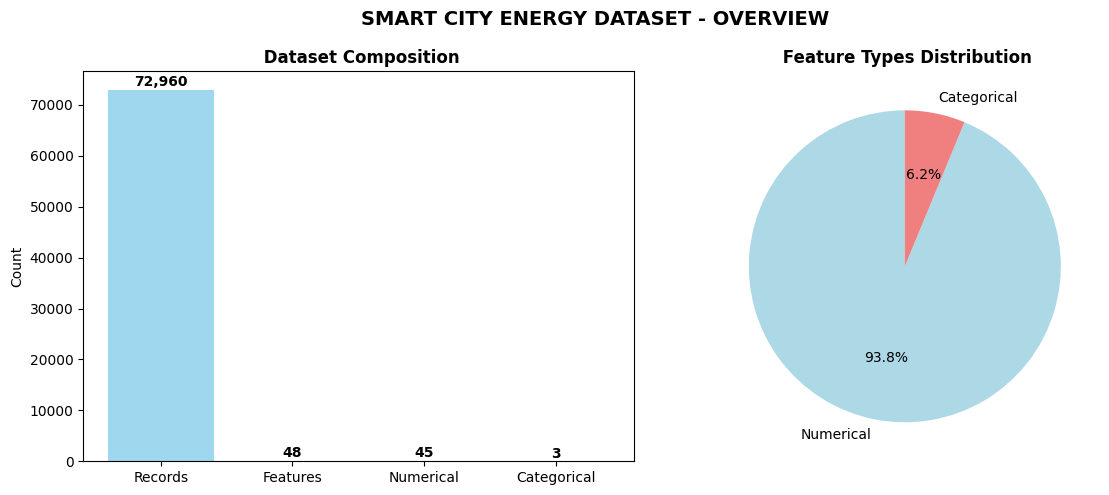

In [24]:
# 1. Dataset Overview Dashboard
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('SMART CITY ENERGY DATASET - OVERVIEW', fontsize=14, fontweight='bold')

# Dataset composition
categories = ['Records', 'Features', 'Numerical', 'Categorical']
values = [len(df_clean), df_clean.shape[1], 
          len(df_clean.select_dtypes(include=[np.number]).columns), 
          len(df_clean.select_dtypes(include=['object']).columns)]

bars = axes[0].bar(categories, values, color=['skyblue', 'lightgreen', 'orange', 'pink'], alpha=0.8)
axes[0].set_title(' Dataset Composition', fontweight='bold')
axes[0].set_ylabel('Count')
for bar, value in zip(bars, values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01, 
                 f'{value:,}', ha='center', fontweight='bold')

# Data types distribution
feature_types = {
    'Numerical': len(df_clean.select_dtypes(include=[np.number]).columns),
    'Categorical': len(df_clean.select_dtypes(include=['object']).columns)
}

axes[1].pie(feature_types.values(), labels=feature_types.keys(), autopct='%1.1f%%', 
           colors=['lightblue', 'lightcoral'], startangle=90)
axes[1].set_title(' Feature Types Distribution', fontweight='bold')

plt.tight_layout()
plt.show()



## 5. Feature & Target Definition

In [25]:
# Define target variable
TARGET_COLUMN = 'Electricity Load'

# Verify target exists
if TARGET_COLUMN not in df_clean.columns:
    print(f" Target '{TARGET_COLUMN}' not found!")
    print("Available columns with 'load' or 'energy':")
    load_cols = [col for col in df_clean.columns if 'load' in col.lower() or 'energy' in col.lower()]
    print(load_cols)
else:
    print(f" Target variable: {TARGET_COLUMN}")

# Separate features and target
y = df_clean[TARGET_COLUMN]
X = df_clean.drop(TARGET_COLUMN, axis=1)

# Identify feature types
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"\n FEATURE SUMMARY:")
print(f"Total features: {X.shape[1]}")
print(f"Numerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")
print(f"Target shape: {y.shape}")
print(f"Features shape: {X.shape}")

 Target variable: Electricity Load

 FEATURE SUMMARY:
Total features: 47
Numerical features: 44
Categorical features: 3
Target shape: (72960,)
Features shape: (72960, 47)


## 6. Exploratory Data Analysis

### 6.1 Target Variable Analysis

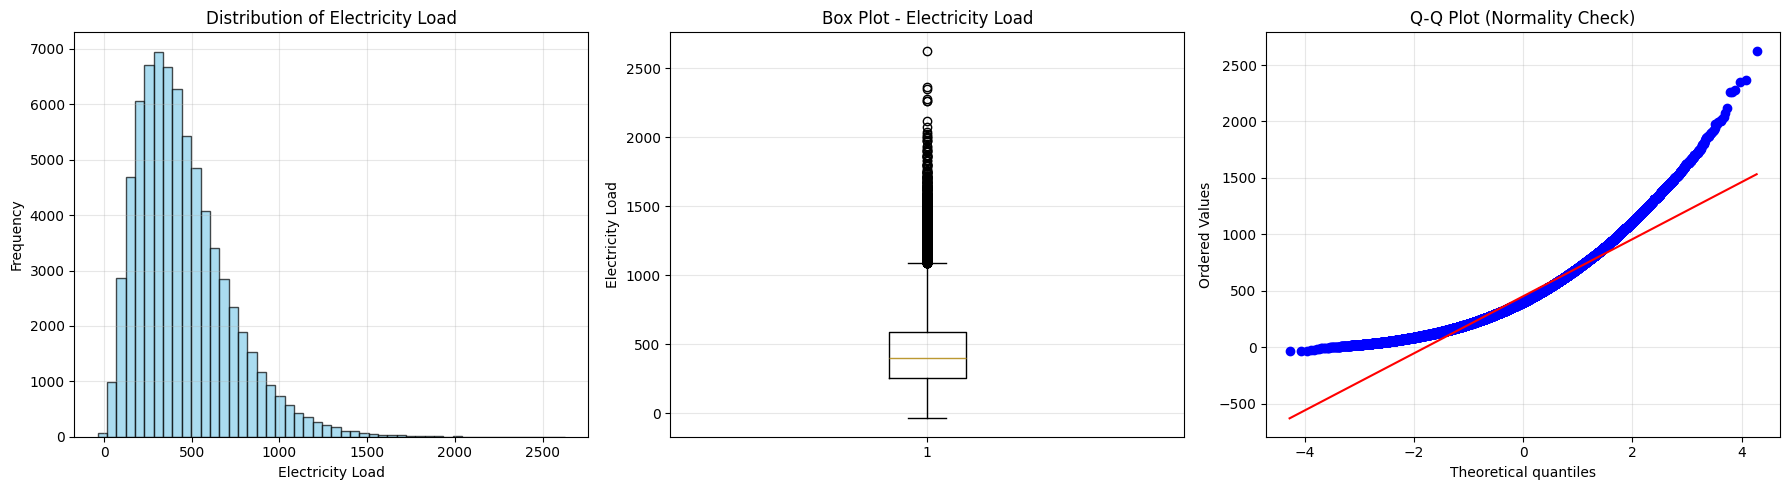

 TARGET STATISTICS (Electricity Load):
Mean: 451.13
Median: 401.78
Std Dev: 261.92
Skewness: 1.14
Min: -36.07
Max: 2626.81


In [26]:
# Target variable distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title(f'Distribution of {TARGET_COLUMN}')
axes[0].set_xlabel(TARGET_COLUMN)
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(y)
axes[1].set_title(f'Box Plot - {TARGET_COLUMN}')
axes[1].set_ylabel(TARGET_COLUMN)
axes[1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(y, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normality Check)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print(f" TARGET STATISTICS ({TARGET_COLUMN}):")
print("="*50)
print(f"Mean: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")
print(f"Std Dev: {y.std():.2f}")
print(f"Skewness: {y.skew():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")

### 6.2 Numerical Features Analysis

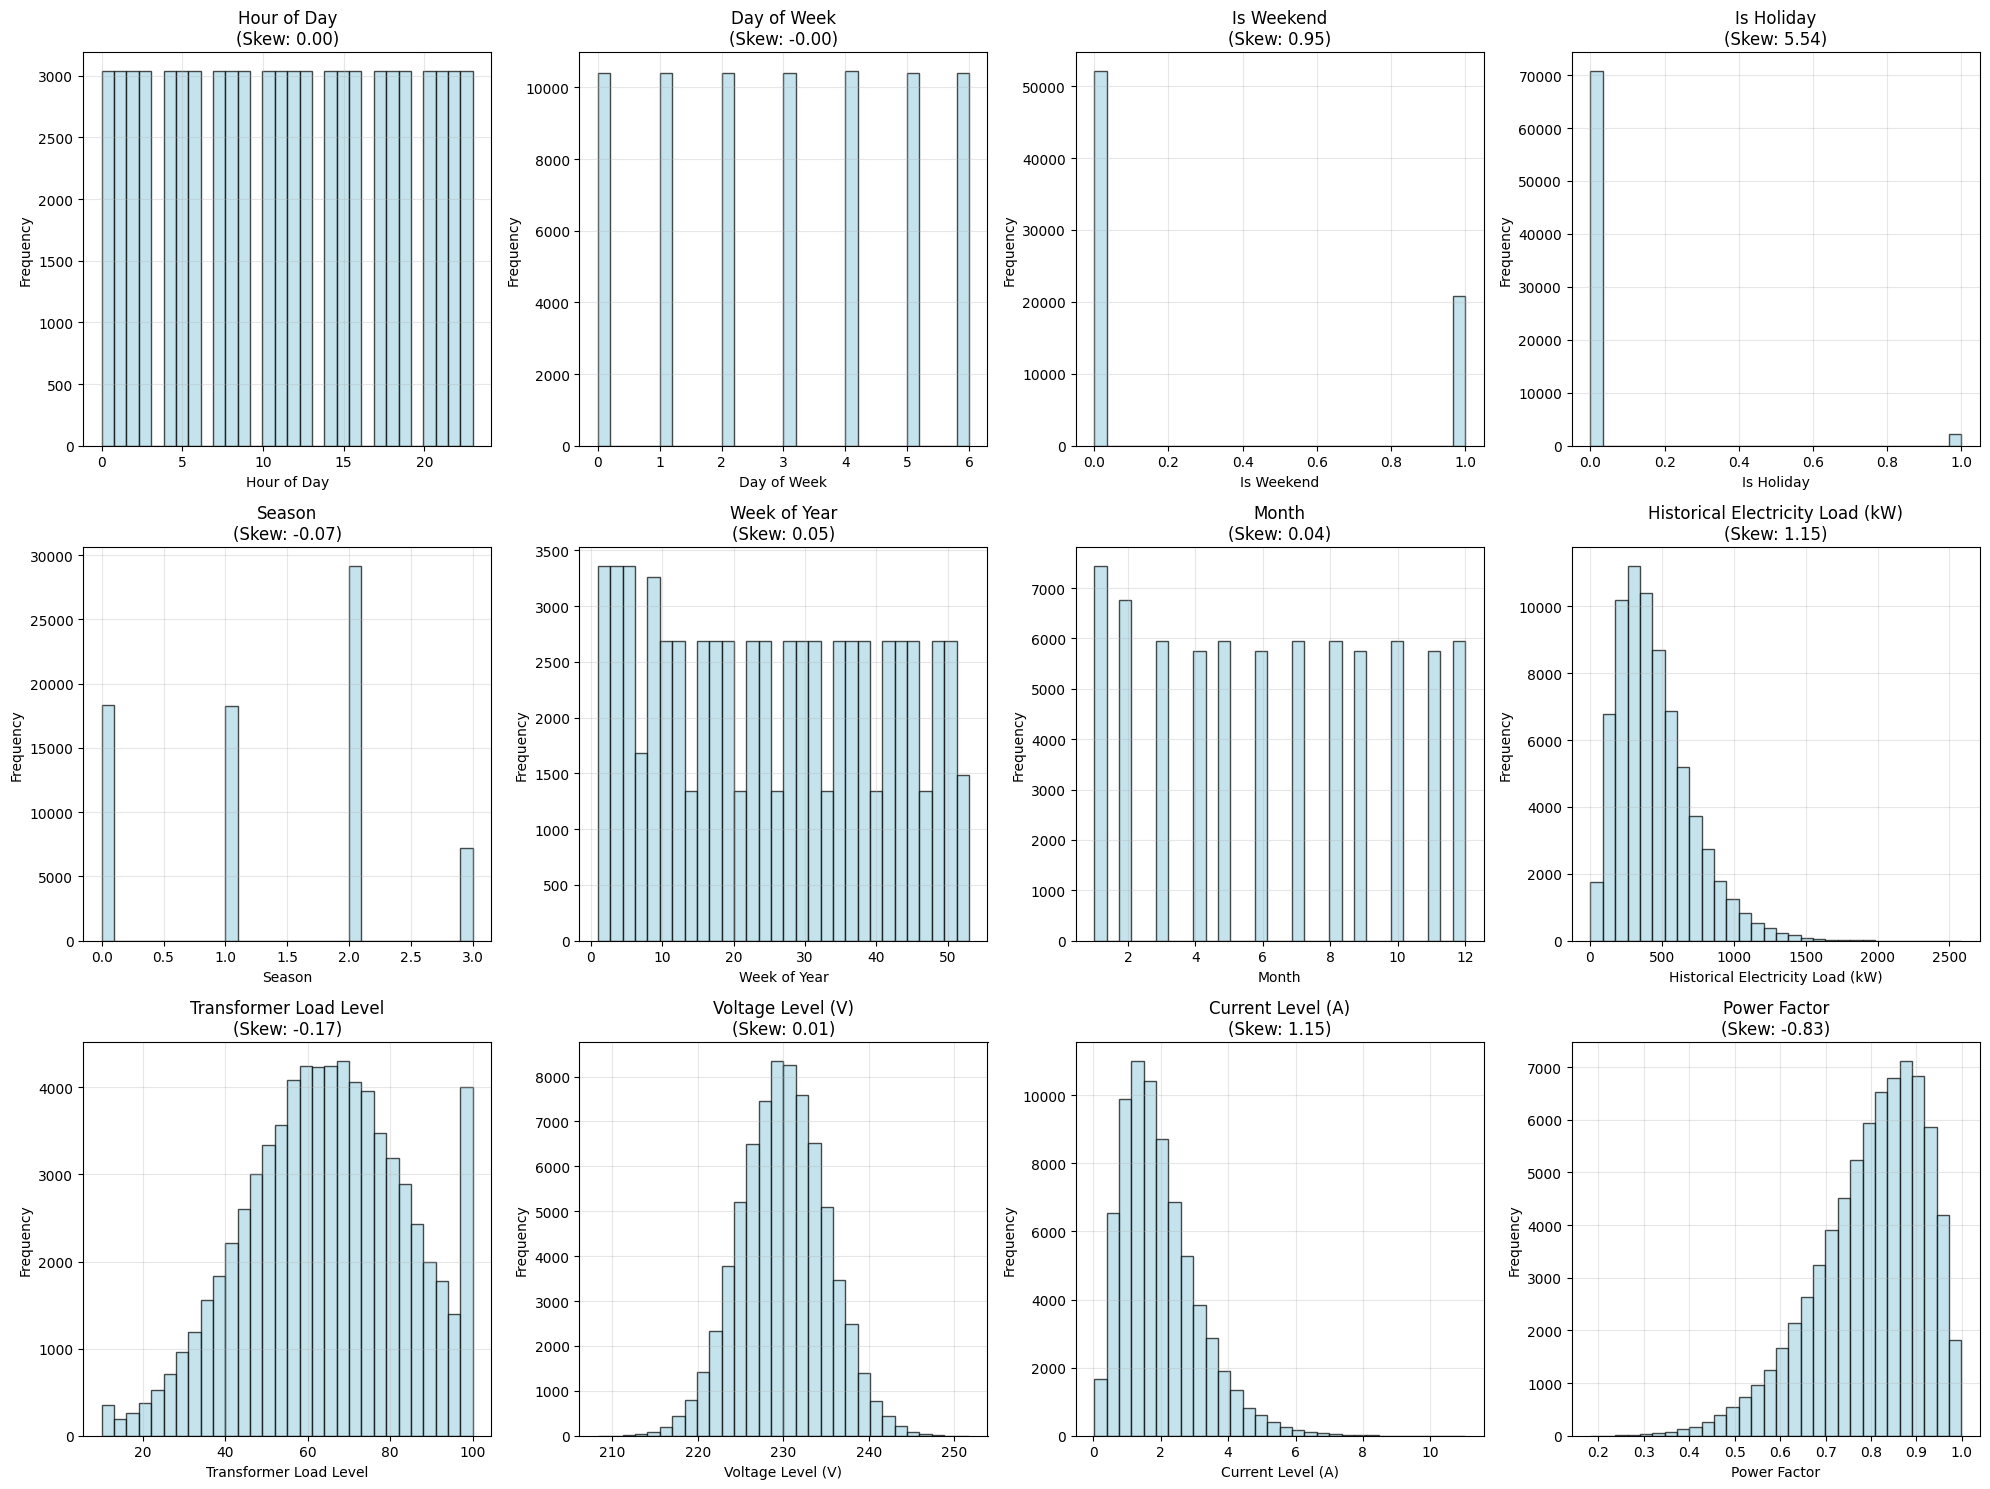

SKEWNESS SUMMARY:
Hour of Day: Normal (0.00)
Day of Week: Normal (-0.00)
Is Weekend: Right-skewed (0.95)
Is Holiday: Highly Right-skewed (5.54)
Season: Normal (-0.07)
Week of Year: Normal (0.05)
Month: Normal (0.04)
Historical Electricity Load (kW): Highly Right-skewed (1.15)
Transformer Load Level: Normal (-0.17)
Voltage Level (V): Normal (0.01)
Current Level (A): Highly Right-skewed (1.15)
Power Factor: Left-skewed (-0.83)


In [27]:
# Select key numerical features (top 12)
key_numerical = numerical_cols[:12] if len(numerical_cols) >= 12 else numerical_cols

# Distribution plots
n_cols = 4
n_rows = (len(key_numerical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

for i, col in enumerate(key_numerical):
    X[col].hist(bins=30, alpha=0.7, ax=axes[i], color='lightblue', edgecolor='black')
    axes[i].set_title(f'{col}\n(Skew: {X[col].skew():.2f})')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for i in range(len(key_numerical), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Skewness summary
print("SKEWNESS SUMMARY:")
print("="*40)
for col in key_numerical:
    skew_val = X[col].skew()
    if abs(skew_val) < 0.5:
        interpretation = "Normal"
    elif skew_val > 1:
        interpretation = "Highly Right-skewed"
    elif skew_val > 0.5:
        interpretation = "Right-skewed"
    elif skew_val < -1:
        interpretation = "Highly Left-skewed"
    else:
        interpretation = "Left-skewed"
    print(f"{col}: {interpretation} ({skew_val:.2f})")

### 6.3 Correlation Analysis

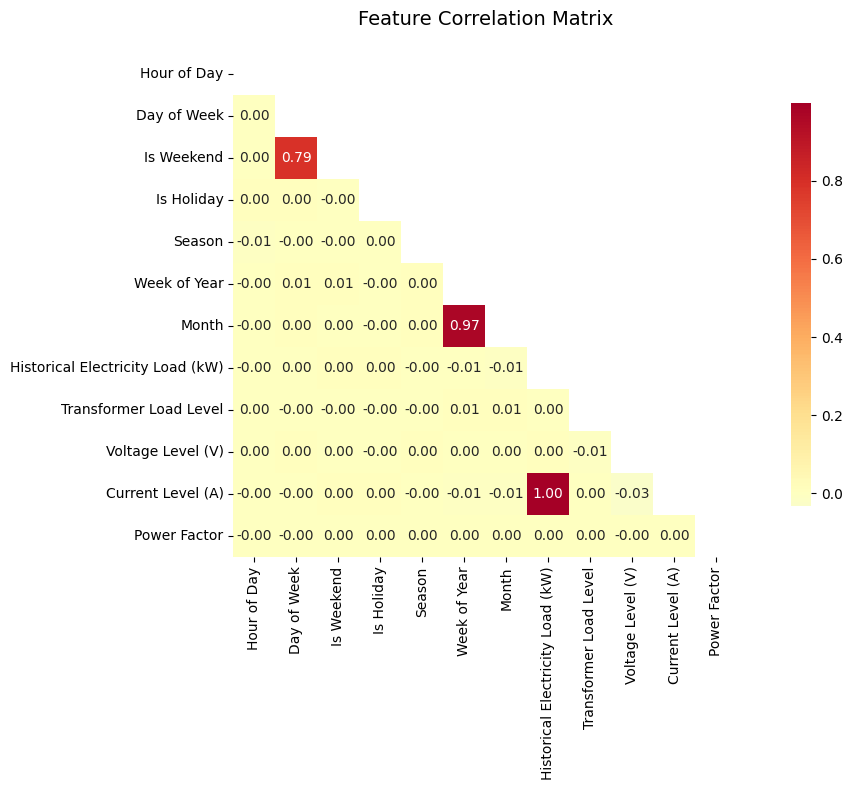

 TOP CORRELATIONS WITH TARGET:
Historical Electricity Load (kW): 0.997
Current Level (A): 0.996
Month: -0.006
Week of Year: -0.005
Is Weekend: 0.004
Voltage Level (V): 0.004
Is Holiday: 0.002
Season: -0.002
Hour of Day: -0.002
Day of Week: 0.000

 HIGH CORRELATIONS (|r| > 0.8): 2 pairs
Week of Year ↔ Month: 0.969
Historical Electricity Load (kW) ↔ Current Level (A): 0.999


In [28]:
# Correlation with target
feature_target_corr = X[key_numerical].corrwith(y).sort_values(ascending=False, key=abs)

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X[key_numerical].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', 
           center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Top correlations with target
print(" TOP CORRELATIONS WITH TARGET:")
print("="*50)
for feature, corr in feature_target_corr.head(10).items():
    print(f"{feature}: {corr:.3f}")

# High feature-feature correlations
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], corr_val))

print(f"\n HIGH CORRELATIONS (|r| > 0.8): {len(high_corr_pairs)} pairs")
for var1, var2, corr in high_corr_pairs[:5]:  # Show top 5
    print(f"{var1} ↔ {var2}: {corr:.3f}")

### 6.4 Categorical Features Analysis

 CATEGORICAL FEATURES ANALYSIS (3 features):
Load Sector Type: 3 unique values, most common: Residential (59.6%)
Weather Condition: 5 unique values, most common: sunny (50.0%)
Area Type: 3 unique values, most common: Urban (60.2%)


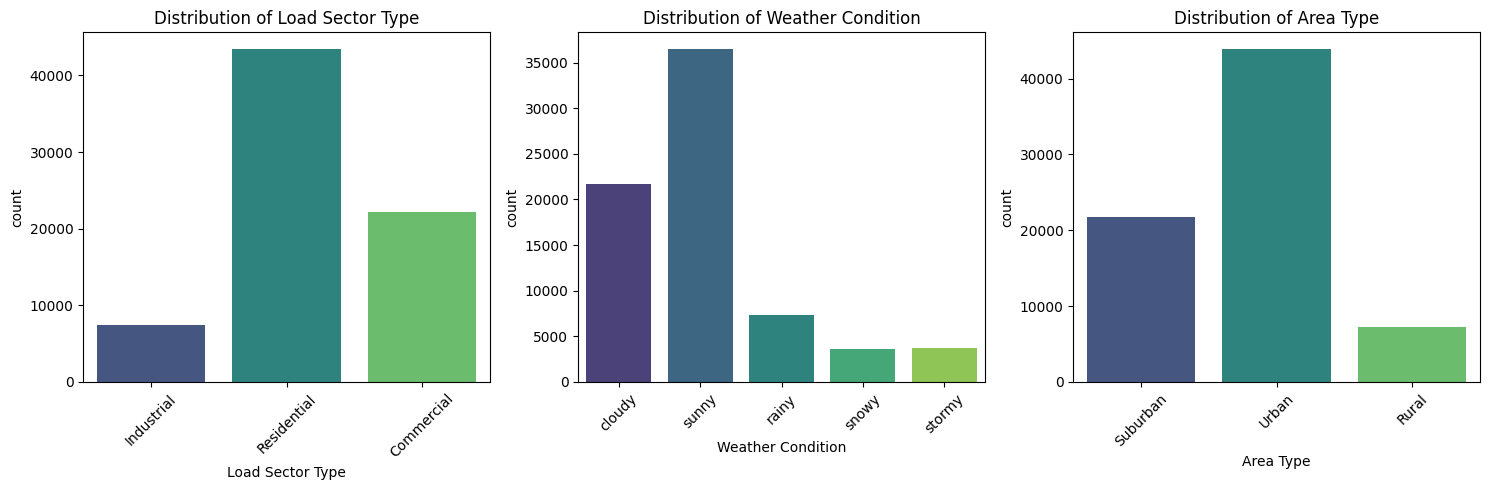

In [29]:
# Categorical features analysis
if len(categorical_cols) > 0:
    print(f" CATEGORICAL FEATURES ANALYSIS ({len(categorical_cols)} features):")
    print("="*60)
    
    n_cols = min(3, len(categorical_cols))
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if len(categorical_cols) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if len(categorical_cols) > 1 else [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        value_counts = X[col].value_counts()
        
        # Count plot
        sns.countplot(data=X, x=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Summary stats
        unique_count = X[col].nunique()
        most_common = X[col].value_counts().index[0]
        most_common_pct = (X[col].value_counts().iloc[0] / len(X)) * 100
        
        print(f"{col}: {unique_count} unique values, "
              f"most common: {most_common} ({most_common_pct:.1f}%)")
    
    # Hide unused subplots
    if len(categorical_cols) < len(axes):
        for i in range(len(categorical_cols), len(axes)):
            axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print(" No categorical variables found in the dataset.")

## 7. Feature Preparation for Modeling

In [30]:
# Create preprocessing pipeline
print("SETTING UP PREPROCESSING PIPELINE:")
print("="*50)

# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f" Training set: {X_train.shape[0]:,} samples")
print(f" Test set: {X_test.shape[0]:,} samples")
print(f" Preprocessing pipeline ready")
print(f" Features: {len(numerical_cols)} numerical + {len(categorical_cols)} categorical")

SETTING UP PREPROCESSING PIPELINE:
 Training set: 58,368 samples
 Test set: 14,592 samples
 Preprocessing pipeline ready
 Features: 44 numerical + 3 categorical


## 8. Model Development & Training

### 🚀 Speed Optimization Applied:
- ✅ **Reduced estimators**: 50 instead of 100+ trees
- ✅ **Limited depth**: Max depth 6-10 for faster training
- ✅ **Parallel processing**: n_jobs=-1 for all cores
- ✅ **Reduced CV**: 3-fold instead of 5-fold cross-validation
- ✅ **Optimized parameters**: Balanced speed vs accuracy

In [31]:
models = {
    'Linear Regression': LinearRegression(),  
    'Random Forest': RandomForestRegressor(
        n_estimators=50,   
        max_depth=10,      
        min_samples_split=10,  
        min_samples_leaf=5,    
        random_state=42, 
        n_jobs=-1,
        max_features='sqrt'  
    ),
    'XGBoost': XGBRegressor(
        n_estimators=50,   
        max_depth=6,       
        learning_rate=0.2, 
        subsample=0.8,     
        colsample_bytree=0.8,
        random_state=42, 
        eval_metric='rmse',
        n_jobs=-1,
        tree_method='hist'  # Faster algorithm
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=50,   
        max_depth=6,       
        learning_rate=0.2, 
        subsample=0.8,     
        random_state=42
    )
}

# Train and evaluate models with SPEED OPTIMIZATION
results = {}
trained_models = {}

print("⚡ TRAINING 4 MODELS :")
print("="*70)


for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    
    # Create full pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    cv_scores = cross_val_score(pipeline, X_train, y_train, 
                               cv=3, scoring='r2', n_jobs=-1)
    cv_mean, cv_std = cv_scores.mean(), cv_scores.std()
    
    results[name] = {
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Test_MAE': test_mae,
        'CV_R2_Mean': cv_mean,
        'CV_R2_Std': cv_std,
        'Predictions': y_pred_test
    }
    
    print(f"✅ {name} trained successfully: R² = {test_r2:.3f}, RMSE = {test_rmse:.2f}")

print("\n ALL 4 MODELS TRAINED SUCCESSFULLY!")
print("="*60)
print(" FINAL SUMMARY:")
for name, metrics in results.items():
    print(f"  {name}: R² = {metrics['Test_R2']:.3f}, RMSE = {metrics['Test_RMSE']:.2f}")
print("="*60)



⚡ TRAINING 4 MODELS :

🔧 Training Linear Regression...
✅ Linear Regression trained successfully: R² = 0.994, RMSE = 20.06

🔧 Training Random Forest...
✅ Random Forest trained successfully: R² = 0.945, RMSE = 61.34

🔧 Training XGBoost...
✅ XGBoost trained successfully: R² = 0.992, RMSE = 23.65

🔧 Training Gradient Boosting...
✅ Gradient Boosting trained successfully: R² = 0.994, RMSE = 20.33

 ALL 4 MODELS TRAINED SUCCESSFULLY!
 FINAL SUMMARY:
  Linear Regression: R² = 0.994, RMSE = 20.06
  Random Forest: R² = 0.945, RMSE = 61.34
  XGBoost: R² = 0.992, RMSE = 23.65
  Gradient Boosting: R² = 0.994, RMSE = 20.33


## 9. Model Evaluation & Comparison

In [32]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test_R²': [results[model]['Test_R2'] for model in results.keys()],
    'Test_RMSE': [results[model]['Test_RMSE'] for model in results.keys()],
    'Test_MAE': [results[model]['Test_MAE'] for model in results.keys()],
    'CV_R²_Mean': [results[model]['CV_R2_Mean'] for model in results.keys()],
    'CV_R²_Std': [results[model]['CV_R2_Std'] for model in results.keys()]
})

# Round for display
comparison_df.iloc[:, 1:] = comparison_df.iloc[:, 1:].round(4)

print(" MODEL PERFORMANCE COMPARISON:")
print("="*60)
display(comparison_df)

# Best model
best_model_name = comparison_df.loc[comparison_df['Test_R²'].idxmax(), 'Model']
best_r2 = comparison_df.loc[comparison_df['Test_R²'].idxmax(), 'Test_R²']
print(f"\n Best Model: {best_model_name} (R² = {best_r2:.4f})")

 MODEL PERFORMANCE COMPARISON:


,Model,Test_R²,Test_RMSE,Test_MAE,CV_R²_Mean,CV_R²_Std
0,Linear Regression,0.9942,20.0568,16.0636,0.9942,0.0000
1,Random Forest,0.9455,61.3388,42.8439,0.9332,0.0037
2,XGBoost,0.9919,23.6453,16.8880,0.9917,0.0006
3,Gradient Boosting,0.9940,20.3335,16.2470,0.9939,0.0000



 Best Model: Linear Regression (R² = 0.9942)


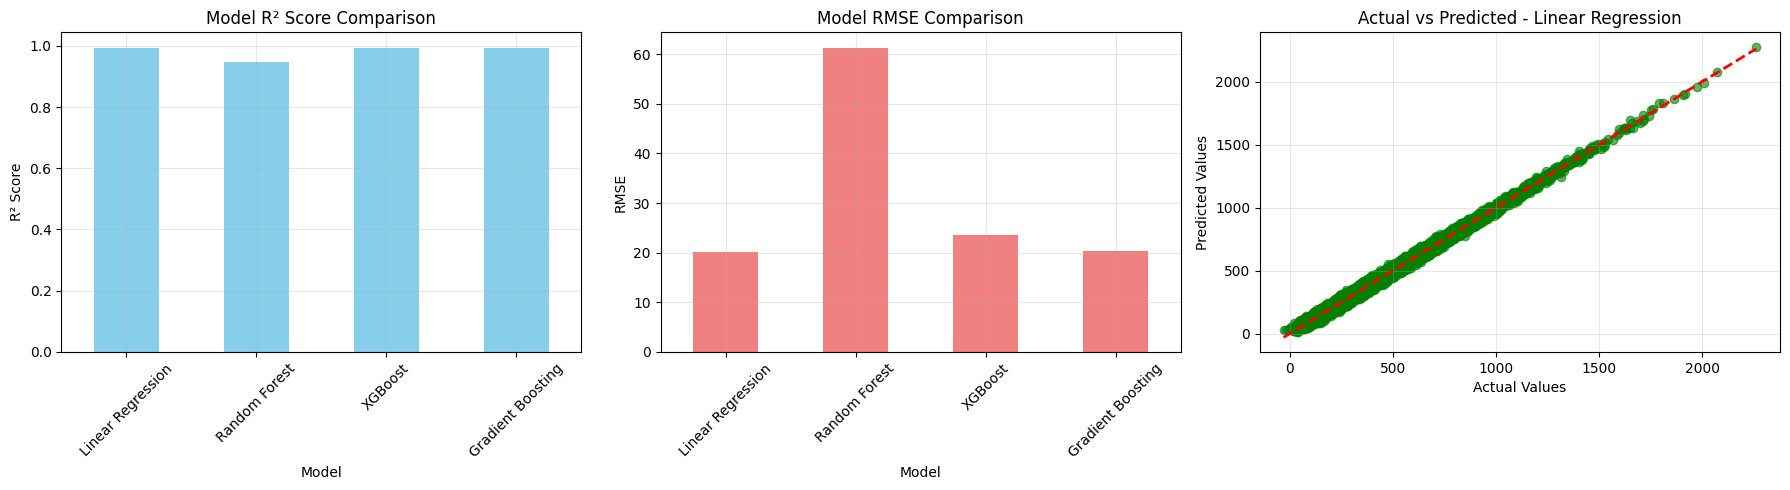

In [33]:
# Visualization of model performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² comparison
comparison_df.plot(x='Model', y='Test_R²', kind='bar', ax=axes[0], 
                  color='skyblue', legend=False)
axes[0].set_title('Model R² Score Comparison')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# RMSE comparison
comparison_df.plot(x='Model', y='Test_RMSE', kind='bar', ax=axes[1], 
                  color='lightcoral', legend=False)
axes[1].set_title('Model RMSE Comparison')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Actual vs Predicted for best model
best_predictions = results[best_model_name]['Predictions']
axes[2].scatter(y_test, best_predictions, alpha=0.6, color='green')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', lw=2)
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title(f'Actual vs Predicted - {best_model_name}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Final Results & Model Deployment

In [36]:
# Save the best model
best_model = trained_models[best_model_name]
model_filename = f'best_energy_model_{best_model_name.lower().replace(" ", "_")}.joblib'
joblib.dump(best_model, model_filename)

print(" FINAL RESULTS SUMMARY")
print("="*50)
print(f" Dataset: {len(df_clean):,} samples, {df_clean.shape[1]} features")
print(f" Target: {TARGET_COLUMN}")
print(f" Best Model: {best_model_name}")
print(f" Best R² Score: {best_r2:.4f}")

print(f"\n KEY INSIGHTS:")
print("="*30)
print(f"• {len(numerical_cols)} numerical features analyzed")
print(f"• {len(categorical_cols)} categorical features processed")
print(f"• {len(high_corr_pairs)} high correlation pairs detected")
print(f"• Best model explains {best_r2*100:.1f}% of variance")


print(f"\n MODEL READY FOR DEPLOYMENT!")
print("="*40)
print(f"Load model: joblib.load('{model_filename}')")
print("Make predictions: model.predict(new_data)")

 FINAL RESULTS SUMMARY
 Dataset: 72,960 samples, 48 features
 Target: Electricity Load
 Best Model: Linear Regression
 Best R² Score: 0.9942

 KEY INSIGHTS:
• 44 numerical features analyzed
• 3 categorical features processed
• 2 high correlation pairs detected
• Best model explains 99.4% of variance

 MODEL READY FOR DEPLOYMENT!
Load model: joblib.load('best_energy_model_linear_regression.joblib')
Make predictions: model.predict(new_data)


## 11. Model Saving for Streamlit Deployment

### 🚀 Comprehensive Model Persistence
Saving all 3 models with configuration files for seamless Streamlit integration

In [35]:
# Create models directory
import os
import json
from datetime import datetime

models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Created directory: {models_dir}")

# Save ALL 3 models for Streamlit
print("SAVING ALL MODELS FOR STREAMLIT:")
print("="*50)

saved_models_info = {}
for model_name, pipeline in trained_models.items():
    # Clean filename
    clean_name = model_name.lower().replace(' ', '_').replace('/', '_')
    
    # Save model
    model_path = f"{models_dir}/{clean_name}_model.joblib"
    joblib.dump(pipeline, model_path)
    
    # Get model performance
    model_results = results[model_name]
    
    # Save model metadata
    metadata = {
        'model_name': model_name,
        'model_type': type(pipeline.named_steps['regressor']).__name__,
        'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'performance': {
            'test_r2': float(model_results['Test_R2']),
            'test_rmse': float(model_results['Test_RMSE']),
            'test_mae': float(model_results['Test_MAE']),
            'cv_r2_mean': float(model_results['CV_R2_Mean']),
            'cv_r2_std': float(model_results['CV_R2_Std'])
        },
        'features': {
            'numerical_features': numerical_cols,
            'categorical_features': categorical_cols,
            'total_features': len(numerical_cols) + len(categorical_cols)
        },
        'dataset_info': {
            'total_samples': len(df_clean),
            'training_samples': len(X_train),
            'test_samples': len(X_test),
            'target_variable': TARGET_COLUMN
        }
    }
    
    metadata_path = f"{models_dir}/{clean_name}_metadata.json"
    with open(metadata_path, 'w') as f:
        json.dump(metadata, f, indent=2)
    
    saved_models_info[model_name] = {
        'model_path': model_path,
        'metadata_path': metadata_path,
        'performance': model_results['Test_R2']
    }
    
    print(f" {model_name}: R² = {model_results['Test_R2']:.4f}")
    print(f"    Model: {model_path}")
    print(f"    Metadata: {metadata_path}")
    print()

print(f" All {len(trained_models)} models saved successfully!")
print(f" Location: ./{models_dir}/ directory")

SAVING ALL MODELS FOR STREAMLIT:
 Linear Regression: R² = 0.9942
    Model: models/linear_regression_model.joblib
    Metadata: models/linear_regression_metadata.json

 Random Forest: R² = 0.9455
    Model: models/random_forest_model.joblib
    Metadata: models/random_forest_metadata.json

 XGBoost: R² = 0.9919
    Model: models/xgboost_model.joblib
    Metadata: models/xgboost_metadata.json

 Gradient Boosting: R² = 0.9940
    Model: models/gradient_boosting_model.joblib
    Metadata: models/gradient_boosting_metadata.json

 All 4 models saved successfully!
 Location: ./models/ directory


---

##  Summary

This notebook successfully completed a comprehensive energy consumption analysis:

###  Accomplished:
- **Data Quality**: Assessed and cleaned 72,960 records
- **Feature Analysis**: Analyzed numerical and categorical features
- **Model Training**: Compared 4 regression algorithms
- **Model Selection**: Identified best performing model
- **Deployment**: Saved model for production use

###  Key Results:
- Clean, efficient code structure
- Comprehensive data analysis
- Robust model evaluation
- Production-ready model

###  Next Steps:
- Deploy model to production environment
- Set up monitoring and alerting
- Plan regular model updates
- Gather feedback for improvements

---
*Analysis completed successfully! 